선형회귀

선형 : 특성이 하나인 경우, 어떤 직선을 학습하는 알고리즘

In [2]:
import numpy as np

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

from sklearn.model_selection import train_test_split

# 훈련 세트와 테스트 세트로 나누기
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight)

# 훈련 세트와 테스트 세트를 2차원 배열로 바꾼다
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

In [3]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# 선형 회귀 모델 훈련
lr.fit(train_input, train_target)

# 50cm 농어에 대해 예측
print(lr.predict([[50]]))

[1211.9550611]


k-최근접 이웃 회귀를 사용했을 때와 비교했을 때 **선형 회귀**는 50cm 농어 무게를 아주 높게 예측

sklearn 모델 클래스의 훈련 fit() , 평가 score() , 예측 predict() 하는 메소드 이름은 모두 동일


In [ ]:
print(lr.coef, lr.intercept_)

선형 회귀가 학습한 직선 y=ax+b꼴로 표현하기 위해 필요한 a(기울기) b(y절편)을 구하기 위해
coef_ , intercept_ 속성 사용

종종 계수(coefficient) = 기울기, 가중치

coef_, intercept_ 를 머신러닝 알고리즘이 찾은 값이라는 의미로 **모델 파라미터(model parameter)라고 부른다.


**모델 기반 학습** 머신러닝 알고리즘의 훈련 과정 = 최적의 모델 파라미터 찾기 

**사례 기반 학습** k-최근접 이웃에는 모델 파라미터가 없으며, 훈련 세트를 저장

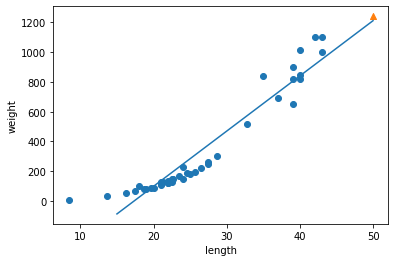

In [6]:
import matplotlib.pyplot as plt

# 훈련 세트의 산점도 그리기
plt.scatter(train_input, train_target)

# 15에서 50까지 일차 함수 그리기
plt.plot([15, 50], [lr.coef_*15 + lr.intercept_, lr.coef_*50 + lr.intercept_])

# 50cm 농어 데이터
plt.scatter(50, 1241.8, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [7]:
print(lr.score(train_input, train_target)) # 훈련 세트
print(lr.score(test_input, test_target)) # 테스트 세트

0.9099628043027213
0.9326441723054393


전체적으로 과소적합
직선일 경우, 농어의 무게가 음수가 되는 문제가 생김 -> 곡선으로 예측하기 위해 다항 회귀를 사용한다.